# Solar Motion Lab 
    Jeremy Palmerio 
    21/04/2023
    
Solar Motion data collected on the 14/04/2023 at  50°50'23.7 N, 5°42'27.3 E.
See Lab Report for more info.

In [205]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
import datetime

In [279]:
df = pd.read_csv('solar_motion_data.csv')
df

,time,little stick shadow lenght (cm),little stick angle (degrees),big stick shadow lenght (cm),big stick angle (degrees),lenght of long stick (cm),lenght of short (cm),thickness of long stick (cm),thickness of small stick (cm),date
0,11:48:36,22.5,51.5,48.40,51.25,43.6,20.9,1.25,0.4,14/04/2023
1,12:00:26,21.6,55.0,46.45,55.50,NaN,NaN,NaN,NaN,NaN
2,12:19:00,20.7,61.0,44.40,61.10,NaN,NaN,NaN,NaN,NaN
3,12:46:30,19.5,70.5,42.25,69.00,NaN,NaN,NaN,NaN,NaN
4,12:57:30,19.3,74.5,41.20,74.00,NaN,NaN,NaN,NaN,NaN
5,13:20:45,18.7,83.0,40.20,83.00,NaN,NaN,NaN,NaN,NaN
6,13:37:50,NaN,NaN,39.80,89.00,NaN,NaN,NaN,NaN,NaN
7,14:02:30,18.8,98.0,40.45,98.00,NaN,NaN,NaN,NaN,NaN
8,14:26:00,19.7,106.5,41.60,106.00,NaN,NaN,NaN,NaN,NaN
9,14:45:00,20.3,114.0,42.60,113.00,NaN,NaN,NaN,NaN,NaN


In [280]:
latex_df = df.loc[:, ['time', 'big stick shadow lenght (cm)', 'big stick angle (degrees)']]
print(latex_df.style.to_latex())

\begin{tabular}{llrr}
 & time & big stick shadow lenght (cm) & big stick angle (degrees) \\
0 & 11:48:36 & 48.400000 & 51.250000 \\
1 & 12:00:26 & 46.450000 & 55.500000 \\
2 & 12:19:00 & 44.400000 & 61.100000 \\
3 & 12:46:30 & 42.250000 & 69.000000 \\
4 & 12:57:30 & 41.200000 & 74.000000 \\
5 & 13:20:45 & 40.200000 & 83.000000 \\
6 & 13:37:50 & 39.800000 & 89.000000 \\
7 & 14:02:30 & 40.450000 & 98.000000 \\
8 & 14:26:00 & 41.600000 & 106.000000 \\
9 & 14:45:00 & 42.600000 & 113.000000 \\
10 & 15:09:30 & 45.500000 & 121.000000 \\
\end{tabular}



# Big Stick Analysis

### Estimatation of local sunrise, noon and sunset




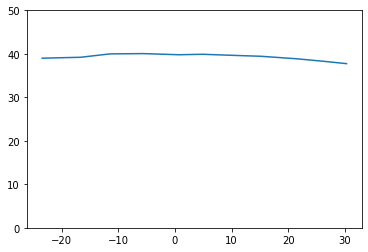

In [281]:
theta = df['big stick angle (degrees)']*np.pi/180
r = df['big stick shadow lenght (cm)']

x = r*np.cos(theta)
y = r*np.sin(theta)

fig, ax = plt.subplots()
ax.set_ylim(bottom = 0, top = 50)

ax.plot(x, y)

In [282]:
df['long ratio'] = df['lenght of long stick (cm)'][0]/df['big stick shadow lenght (cm)']
df['long ratio']

0     0.900826
1     0.938644
2     0.981982
3     1.031953
4     1.058252
5     1.084577
6     1.095477
7     1.077874
8     1.048077
9     1.023474
10    0.958242
Name: long ratio, dtype: float64

In [283]:
df['time'] = df['time'].apply(lambda x: '14-04-2023 ' + x)

In [284]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y %H:%M:%S')
df['time'] = df['time'].apply(lambda x: int(time.mktime(x.timetuple()))).astype(int)

In [285]:
df['altitude (degrees)'] = np.arctan(df['long ratio'])*180/np.pi

/Users/jeremypalmerio/opt/miniconda3/envs/py3/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


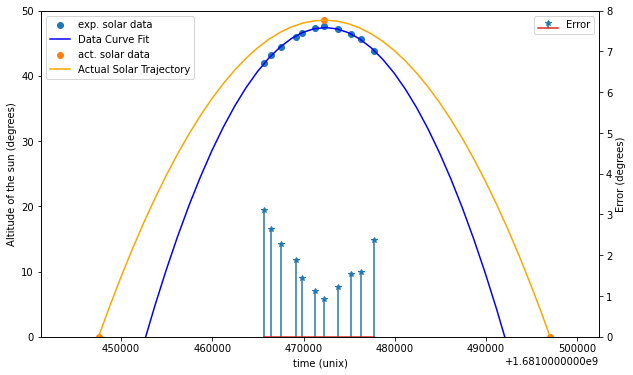

In [294]:
#my solar data 
x = df['time']
y = df['altitude (degrees)']
plt.figure(figsize=(10,6))


scaler_x = StandardScaler()
x_norm = scaler_x.fit_transform(x.values.reshape(-1, 1)).ravel()

scaler_y = StandardScaler()
y_norm = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

popt_norm, pcov_norm = curve_fit(func, x_norm, y_norm)

a_norm, b_norm, c_norm = popt_norm
a = float(scaler_y.scale_ / scaler_x.scale_**2 * a_norm)
b = float(scaler_y.scale_ / scaler_x.scale_ * b_norm - scaler_x.mean_ * scaler_y.scale_ / scaler_x.scale_**2 * a_norm - scaler_x.mean_ * a)
c = float(scaler_y.mean_ + scaler_y.scale_ * c_norm - scaler_x.mean_**2 * a - scaler_x.mean_ * b)

#actual solar data
sunrise = to_unix("6:45:17")
local_noon = to_unix("13:37:31")
sunset = to_unix("20:30:50")

sun_x = pd.Series([sunrise, local_noon, sunset])
sun_y = pd.Series([0, 48.54, 0])


scaler_x = StandardScaler()
x_norm_sun = scaler_x.fit_transform(sun_x.values.reshape(-1, 1)).ravel()

scaler_y = StandardScaler()
y_norm_sun = scaler_y.fit_transform(sun_y.values.reshape(-1, 1)).ravel()

popt_norm_sun, pcov_norm_sun = curve_fit(func, x_norm_sun, y_norm_sun)

a_norm_sun, b_norm_sun, c_norm_sun = popt_norm_sun
a_sun = float(scaler_y.scale_ / scaler_x.scale_**2 * a_norm_sun)
b_sun = float(scaler_y.scale_ / scaler_x.scale_ * b_norm_sun - scaler_x.mean_ * scaler_y.scale_ / scaler_x.scale_**2 * a_norm_sun - scaler_x.mean_ * a_sun)
c_sun = float(scaler_y.mean_ + scaler_y.scale_ * c_norm_sun - scaler_x.mean_**2 * a_sun - scaler_x.mean_ * b_sun)



#plotting my data
plt.scatter(x, y, label='exp. solar data')
curve_x = np.linspace(to_unix("5:00:00"), to_unix("22:00:00"))
plt.plot(curve_x, func(curve_x, a, b, c), 'b', label='Data Curve Fit')
plt.xlim(to_unix("5:00:00"), to_unix("22:00:00"))

#plotting actual sun data
plt.scatter(sun_x, sun_y, label= 'act. solar data')
plt.plot(curve_x, func(curve_x, a_sun, b_sun, c_sun), color='orange', label='Actual Solar Trajectory')
plt.xlim(to_unix("5:00:00"), to_unix("22:00:00"))

#plotting error
error = abs(y-func(x, a_sun, b_sun, c_sun))
ax1 = plt.gca()  # get current axis
ax2 = ax1.twinx()  # create second y-axis
ax2.stem(x, error,markerfmt= '*', label='Error')
ax2.set_ylabel('Error')
ax2.set_ylim(0,8)
ax1.set_ylim(0,50)
ax1.set_xlabel('time (unix)')
ax1.set_ylabel('Altitude of the sun (degrees)')
ax2.set_ylabel('Error (degrees)')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig("Elevation.png")
plt.show()



In [318]:
est_local_noon = np.roots([2*a, b])[0]
func(est_local_noon, a_sun, b_sun, c_sun)
unix_to_localtime(est_local_noon)

'2023-04-14 13:39:37'

In [310]:
roots = np.roots((2*a, b))
unix_to_localtime(roots[0])


'2023-04-14 13:39:37'

In [112]:
def func(x, a, b, c):
    return a*x**2 + b*x + c 


In [101]:
def to_unix(local_time):
    date_string = "2023-04-14 "
    date_string+=local_time
# Convert the string to a Pandas datetime object
    datetime_obj = pd.to_datetime(date_string)

# Convert the datetime object to Unix time
    unix_time = int(time.mktime(datetime_obj.timetuple()))
    return unix_time

In [149]:
def unix_to_localtime(unix_timestamp):
    # Convert the Unix timestamp to a datetime object
    utc_time = datetime.datetime.utcfromtimestamp(unix_timestamp)

    # Convert the datetime object to the local timezone
    local_time = utc_time.replace(tzinfo=datetime.timezone.utc).astimezone(tz=None)

    # Return the local time as a string
    return local_time.strftime('%Y-%m-%d %H:%M:%S')

In [151]:
unix_to_localtime(to_unix("15:00:00"))

'2023-04-14 15:00:00'

### Estimating the Azimuth angle of the Sun


In [290]:
df["azimuth (degrees)"] = df['big stick angle (degrees)']+90

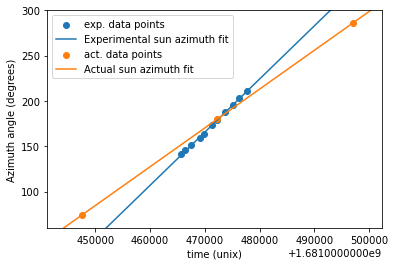

In [291]:
#my data
y = df['azimuth (degrees)']
plt.scatter(x, y, label= 'exp. data points')
plt.xlim(to_unix("5:00:00"), to_unix("22:00:00"))
plt.ylim(60, 300)


popt_lin, pcov_lin = curve_fit(linfunc, x, y)
plt.plot(curve_x, linfunc(curve_x, *popt_lin), label = 'Experimental sun azimuth fit')


#actual solar data
azimuth = pd.Series([74, 180, 286])
sun_time = sun_x
plt.scatter(sun_x,azimuth, label = "act. data points")

popt_lin_sun, pcov_lin_sun = curve_fit(linfunc, sun_time, azimuth)
plt.plot(curve_x, linfunc(curve_x, *popt_lin_sun), label = "Actual sun azimuth fit")
plt.legend()
plt.xlabel('time (unix)')
plt.ylabel('Azimuth angle (degrees)')
plt.savefig("Azimuth.png")

In [199]:
print(linfunc(sunrise, *popt_lin))
print(linfunc(local_noon, *popt_lin))
print(linfunc(sunset, *popt_lin))


33.822512708604336
178.79921576939523
324.1569120269269


In [201]:
unix_to_localtime(sunrise), unix_to_localtime(local_noon), unix_to_localtime(sunset)

('2023-04-14 06:45:17', '2023-04-14 13:37:31', '2023-04-14 20:30:50')

In [187]:
def linfunc(x, a, b):
    return a*x+b